In [6]:
import ast
import numpy as np
import time
import sys
import pandas as pd
import subprocess
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import random as rand
import matplotlib.pyplot as plt

In [25]:
%%time
from npm1_data_loading import km_normed_1, npm1_filtered
classifier = MLPClassifier(hidden_layer_sizes=(512,128,8), 
                           max_iter=1000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='adaptive', 
                           tol=0, shuffle=True, 
                           random_state=0, verbose=0
                           )
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, npm1_filtered, random_state=0)
classifier.fit(x_train, y_train)

CPU times: user 15min 6s, sys: 32.7 s, total: 15min 39s
Wall time: 23.6 s


MLPClassifier(hidden_layer_sizes=(512, 128, 8), learning_rate='adaptive',
              max_iter=1000, random_state=0, solver='sgd', tol=0, verbose=0)

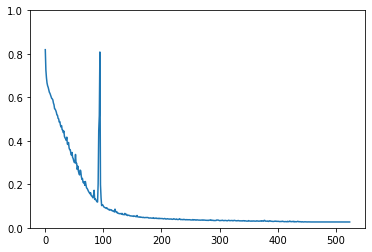

0.984375


In [26]:
plt.plot(classifier.loss_curve_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier.predict(x_test)
print(roc_auc_score(y_test, y_pred))

In [29]:
sum(npm1_filtered), len(npm1_filtered) - sum(npm1_filtered)

(242, 449)